In [13]:
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# 0) Exploratory Analysis

In [3]:
df = web.DataReader("PIORECRUSDM", "fred", start, end)

df.rename(columns={"PIORECRUSDM": "IronOre_USD_per_ton"}, inplace=True)
print(df.tail())

            IronOre_USD_per_ton
DATE                           
2025-02-01           108.200000
2025-03-01           103.652381
2025-04-01           100.909091
2025-05-01           100.272727
2025-06-01            96.166667


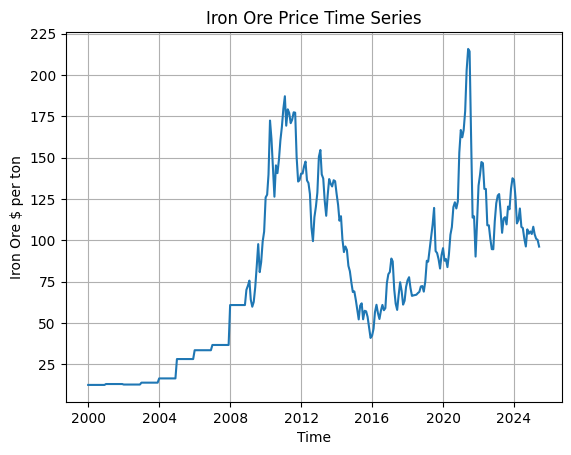

In [6]:
plt.plot(df)
plt.ylabel("Iron Ore $ per ton")
plt.xlabel("Time")
plt.title("Iron Ore Price Time Series")
plt.grid(True)

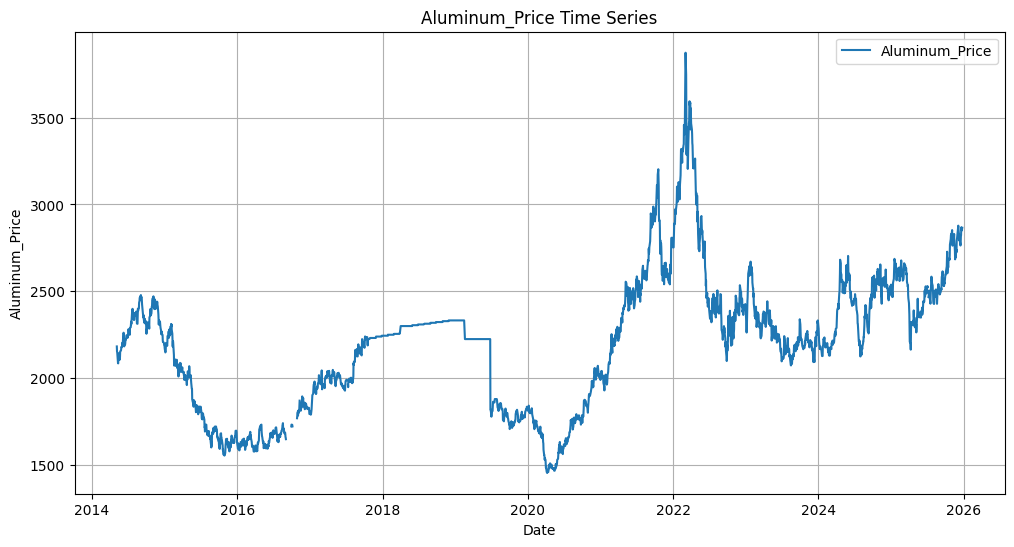

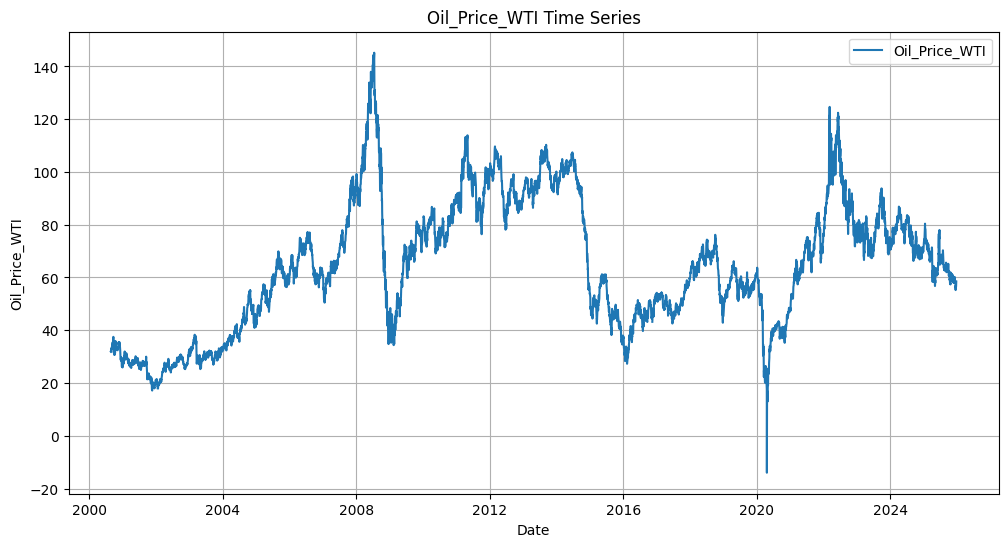

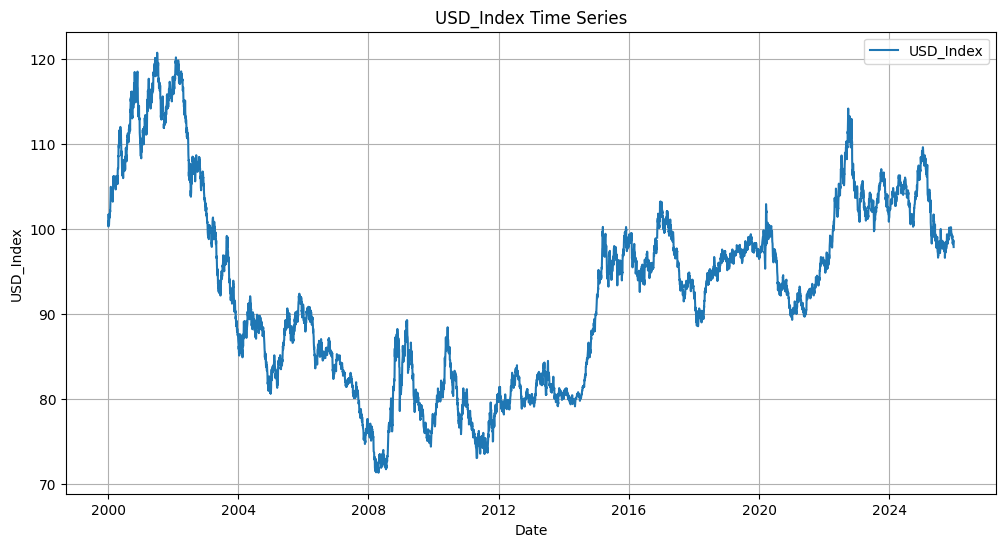

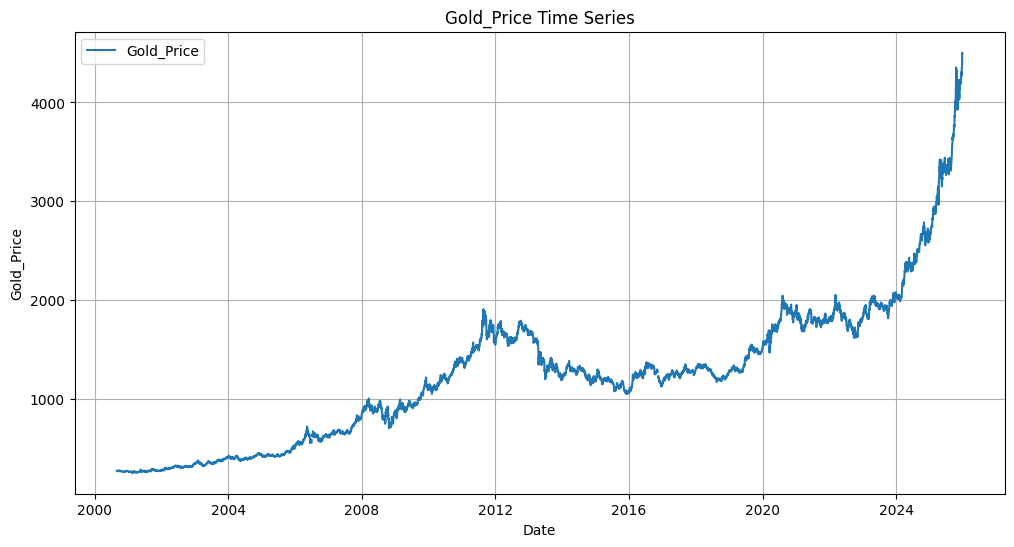

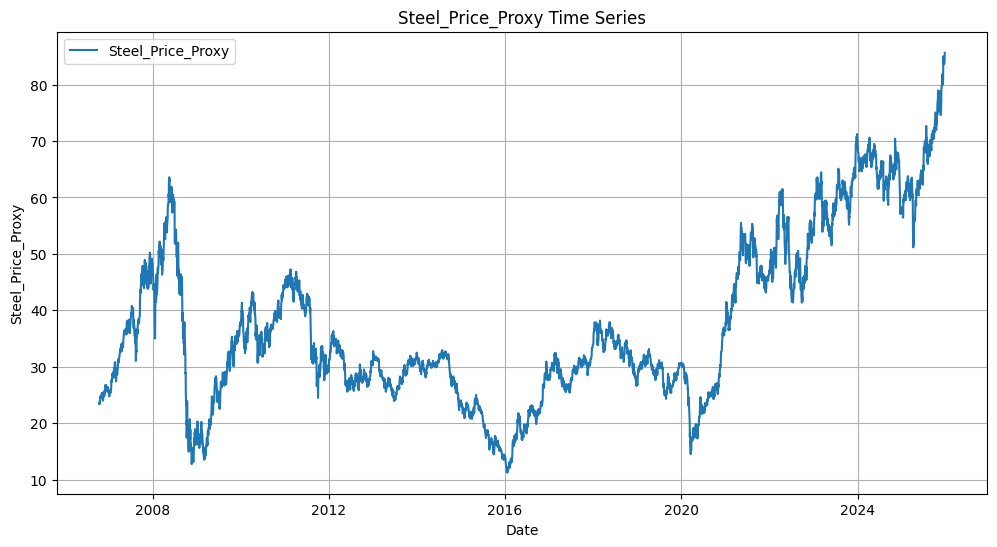

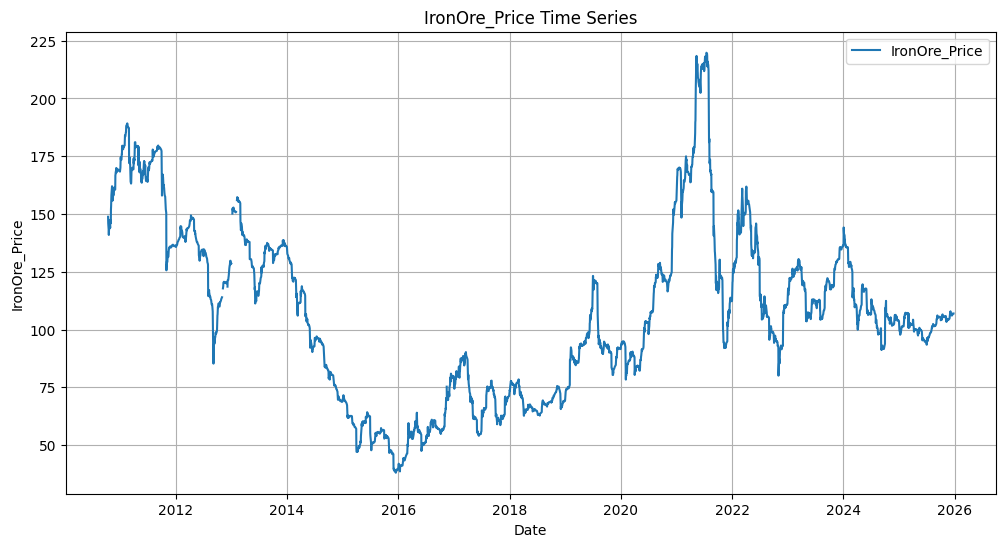

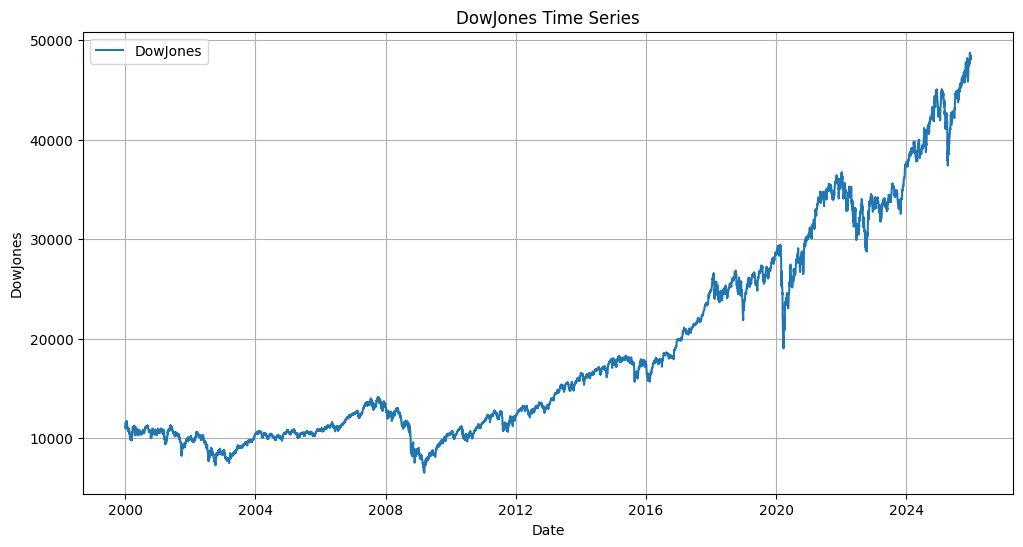

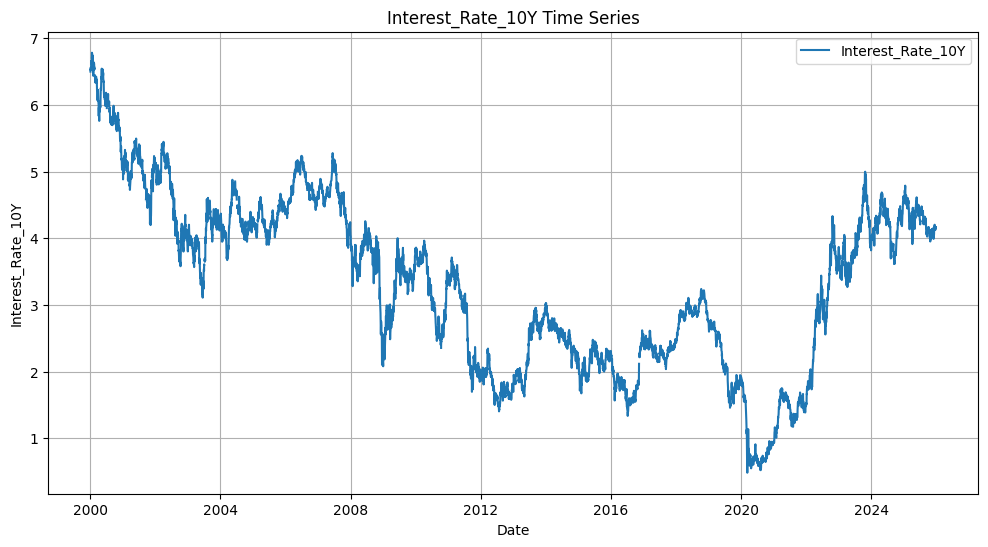

In [9]:
# Date range
start = "2000-01-01"
end = datetime.today().strftime("%Y-%m-%d")

# Tickers dictionary
tickers = {
    "Gold_Price": "GC=F",
    "USD_Index": "DX-Y.NYB",
    "Oil_Price_WTI": "CL=F",
    "Interest_Rate_10Y": "^TNX",
    "DowJones": "^DJI",
    "Steel_Price_Proxy": "SLX",
    "Aluminum_Price": "ALI=F",
    "IronOre_Price": "TIO=F"
}

# Download data
raw_df = yf.download(
    list(tickers.values()),
    start=start,
    end=end,
    progress=False
)['Open']

# Correctly map columns
df = raw_df.copy()
df.columns = [list(tickers.keys())[list(tickers.values()).index(c)] for c in raw_df.columns]

# Plot each time series on a separate plot
for col in df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[col], label=col)
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
df.describe()

,Aluminum_Price,Oil_Price_WTI,USD_Index,Gold_Price,Steel_Price_Proxy,IronOre_Price,DowJones,Interest_Rate_10Y
count,2892.000000,6363.000000,6564.000000,6354.000000,4828.000000,3810.000000,6535.000000,6529.000000
mean,2199.456950,64.680259,92.870165,1249.555918,37.419473,106.920281,18948.912761,3.311133
std,379.240251,24.586473,11.301247,724.718816,14.989167,37.086024,10459.405799,1.294274
min,1456.000000,-14.000000,71.330002,255.000000,11.204540,38.029999,6547.009766,0.484000
25%,1886.125000,46.279999,82.657503,648.699982,27.178518,76.209999,10632.299805,2.229000
50%,2231.500000,63.750000,93.360001,1248.350037,32.311297,104.935001,13881.929688,3.413000
75%,2411.500000,81.940002,100.314999,1676.900024,46.523168,130.905003,25988.469727,4.294000
max,3873.000000,145.190002,120.760002,4503.299805,85.639999,219.770004,48714.750000,6.781000


In [11]:
oldest_dates = df.apply(lambda col: col.first_valid_index())
oldest_dates

Aluminum_Price      2014-05-06
Oil_Price_WTI       2000-08-23
USD_Index           2000-01-03
Gold_Price          2000-08-30
Steel_Price_Proxy   2006-10-17
IronOre_Price       2010-10-14
DowJones            2000-01-03
Interest_Rate_10Y   2000-01-03
dtype: datetime64[ns]

In [16]:
import pandas_datareader.data as web
from datetime import datetime

# Date range
start = "2000-01-01"
end = datetime.today()

# FRED series mapping for the indicators you listed
fred_series = {
    "Exchange Rate": "DEXUSAL",          # US Dollar to Australian Dollar (example, adjust if needed)
    "Inflation Rate": "CPIAUCSL",        # CPI for All Urban Consumers (example for US inflation)
    "Interest Rate": "DGS10",            # 10-Year Treasury Constant Maturity Rate
    "US GDP": "GDP",                      # US Gross Domestic Product
}

# Download data from FRED
df_fred = pd.DataFrame()
for name, code in fred_series.items():
    df_fred[name] = web.DataReader(code, 'fred', start, end)


# Show first few rows
print(df_fred.head())


            Exchange Rate  Inflation Rate  Interest Rate  US GDP
DATE                                                            
2000-01-03         0.6591             NaN           6.58     NaN
2000-01-04         0.6562             NaN           6.49     NaN
2000-01-05         0.6550             NaN           6.62     NaN
2000-01-06         0.6540             NaN           6.57     NaN
2000-01-07         0.6548             NaN           6.52     NaN


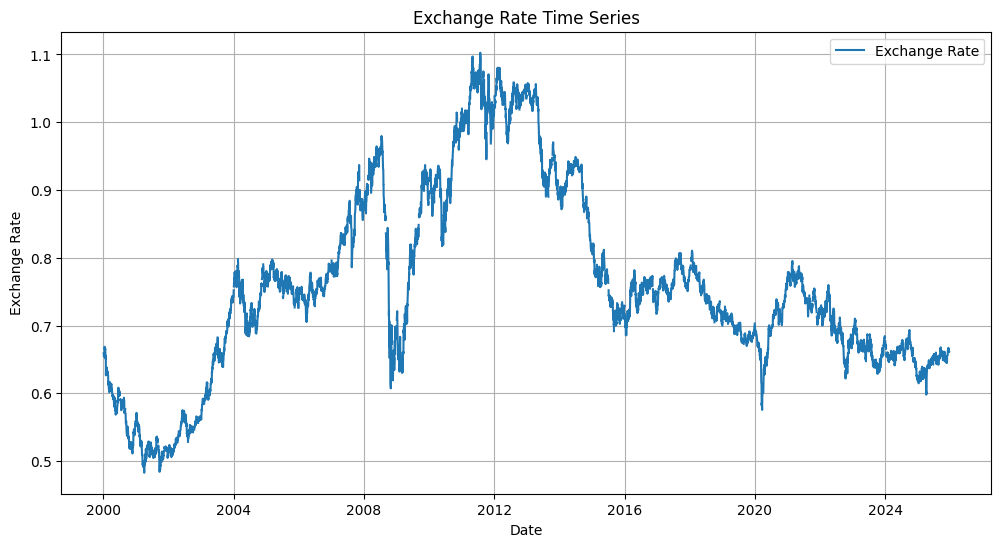

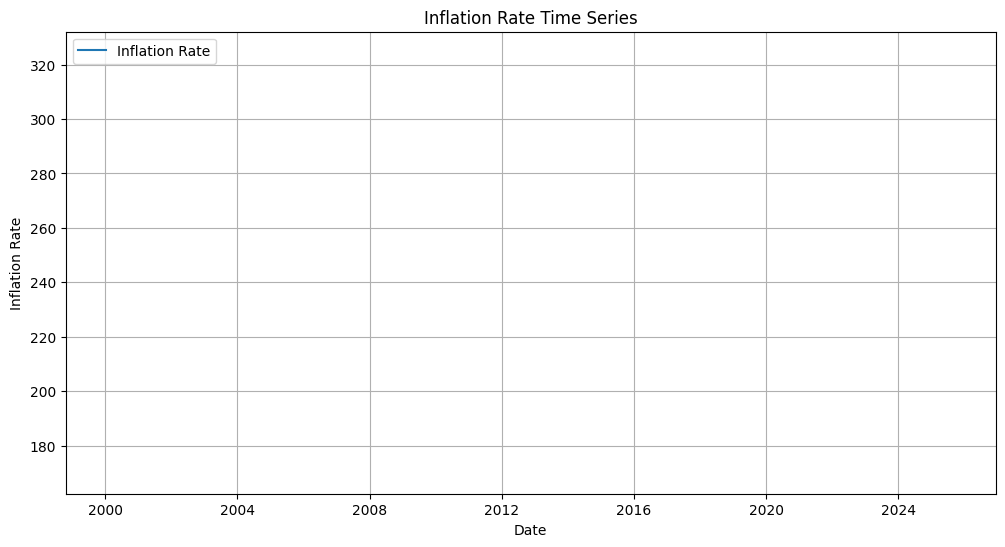

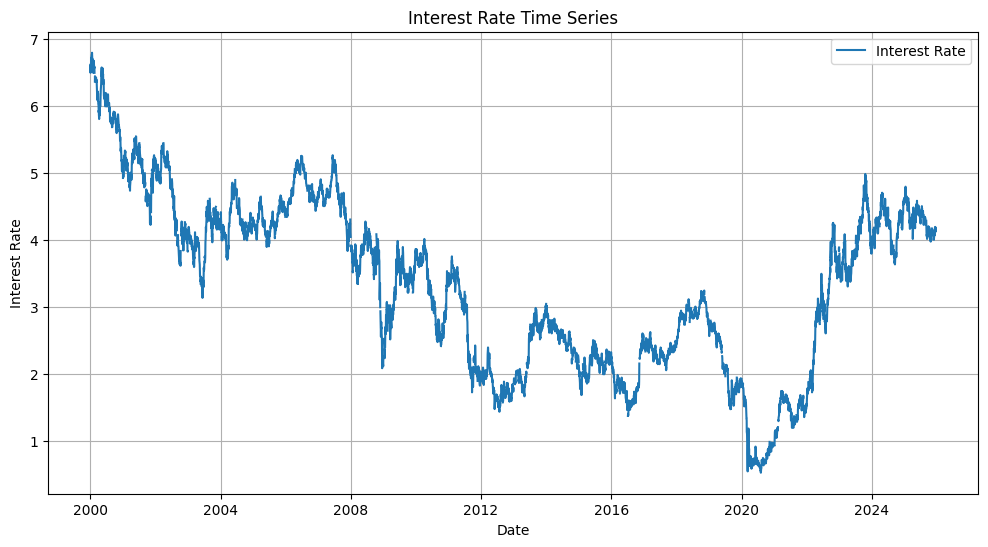

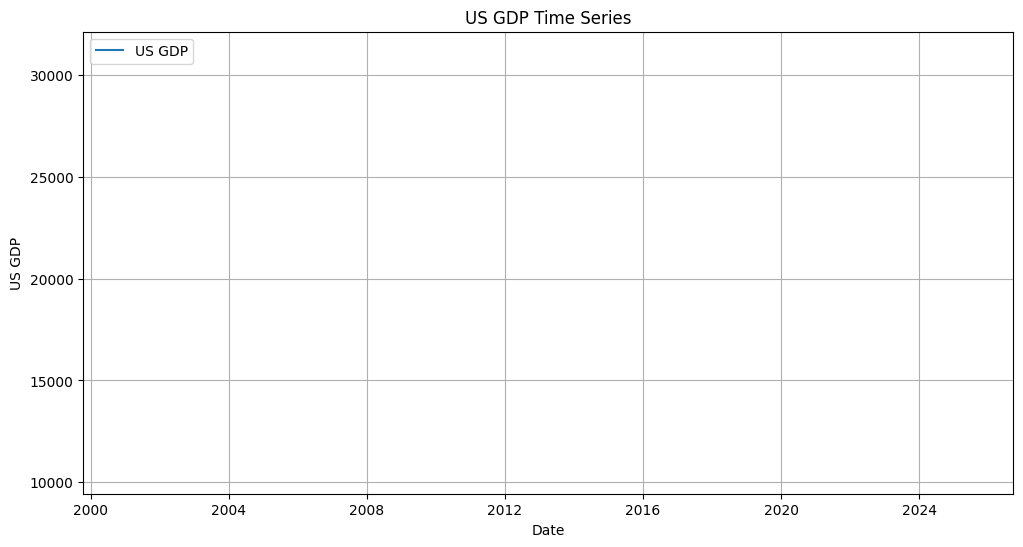

In [17]:
# Plot each series on a separate figure
for col in df_fred.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df_fred.index, df_fred[col], label=col)
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()